# Game Overview
The game involves a fair coin ($p_{H} = p_{T} = 0.5$). The game is played under the following rules and conditions:

### Starting Point:
You begin the game with zero heads ($H=0$) and zero tails ($T=0$).

### Gameplay:
You toss the coin repeatedly. Each toss has two possible outcomes:

- Heads: $H$ increases by 1.
- Tails: $T$ increases by 1.

### Stopping the Game:
At any point after each toss, you may choose to stop the game.
Once you stop, the game's outcome is evaluated based on the current counts of $H$ and $T$.

### Winning Condition:
The reward is proportional to the number of heads ($H / H+T$) at the moment you stop, but only if $H>T$.
If $H≤T$ at the moment you stop, your reward is 0.

### Game Constraints:
The game has a maximum number of tosses $n_{max}$, after which the game ends automatically.
If you do not stop before the maximum number of tosses, the game evaluates $H$ and $T$ at the end.

## Objective
The objective is to maximize your expected reward.

## Suggested Optimal Strategy
1. Evaluate **current state**:
    - $H$ and $T$ so far,
    - Total tosses: $H+T$
    - Tosses remaining: $n_{max} - (H+T)$
2. Stopping rule:
    - if $H>T$ *and* Expected Reward of Stopping > Expected Reward of Continuing -> Stop
    - else -> Continue

**Expected Reward**:

- Stopping / End of Game: $R(H,T) = H/(H+T)$ if $H>T$ else $0.$
- Continue: $R(H,T) = 0.5 * R(H+1,T) + 0.5 * R(H,T+1)$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
p_H = 0.5
n_max = 100
base_reward = 100 # Amount of money multiplied by the factor H/H+T when the game ends

**Reward table**: each cell represents the maximum expected reward for the corresponding (H,T) state, according to the defined strategy.

In [3]:
def calculate_reward_table(n_max, p_H):
    rew_table = np.zeros((n_max + 1, n_max + 1))

    # Compute values backwards from the last toss, so +1 quantities are available
    for H in np.arange(n_max, -1, -1):
        for T in np.arange(n_max, -1, -1):
            if H + T >= n_max:
                # Game ends after 100 tosses
                rew_table[H, T] = H / n_max if H > T else 0
            else:
                # Expected Reward of continuing the game
                continue_heads = rew_table[H + 1, T] if H + 1 <= n_max else 0
                continue_tails = rew_table[H, T + 1] if T + 1 <= n_max else 0

                # Optimal Reward: max between stopping and continuing
                rew_table[H, T] = np.max([H/(H+T) if H > T else 0, p_H * continue_heads + (1. - p_H) * continue_tails])
    return rew_table

In [4]:
rew_table = calculate_reward_table(n_max, p_H)

The optimal expected reward is located at position `[0,0]`, because this position considers all the toss outcomes and it includes all the best decisions at every possible state of the game.

In [5]:
print(f"Optimal Expected Reward: {rew_table[0, 0] * base_reward:.2f}$")

Optimal Expected Reward: 74.55$


## Expected Rew vs. $n_{max}$

In [6]:
ns = np.arange(10, 500, 10)

In [7]:
rews = [calculate_reward_table(n, p_H)[0, 0] * base_reward for n in ns]

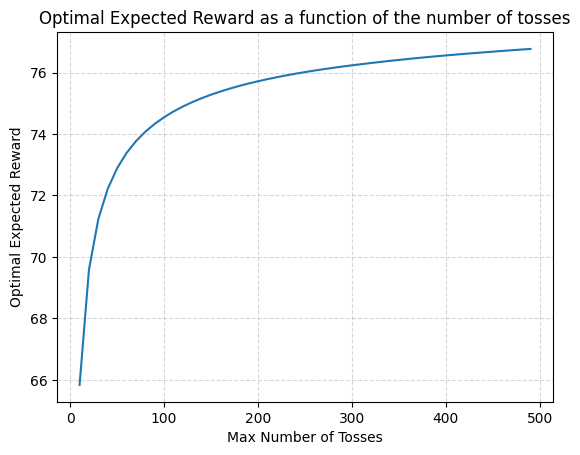

In [8]:
fig, ax = plt.subplots()

ax.plot(ns, rews)
ax.set_xlabel("Max Number of Tosses")
ax.set_ylabel("Optimal Expected Reward")
ax.set_title("Optimal Expected Reward as a function of the number of tosses")
ax.grid(True, which="both", ls="--", alpha=0.5)

## Optimal Number of Tosses

Simulate games to evaluate the optimal number of tosses.

In [9]:
def simulate_optimal_tosses(reward_table, max_tosses):
    H = 0
    T = 0
    toss = 0

    while toss < max_tosses:
        toss += 1
        if np.random.rand() < 0.5:  # Heads
            H += 1  
        else:  # Tails
            T += 1  

        # Check if it is optimal to stop the game
        if H > T and reward_table[H, T] == H/(H+T):
            break

    return toss

In [10]:
num_simulations = 100000
optimal_toss_counts = [
    simulate_optimal_tosses(rew_table, n_max)
    for _ in range(num_simulations)
]

From the simulations, we can estimate the average number of tosses in games played with the optimal strategy:

In [11]:
average_tosses = np.mean(optimal_toss_counts)
std_tosses = np.std(optimal_toss_counts)

In [12]:
print(f"Avg. Number of tosses:{average_tosses}")
print(f"Med. Number of Tosses: {np.median(optimal_toss_counts)}")
print(f"Std. Dev: {std_tosses}")

Avg. Number of tosses:15.14379
Med. Number of Tosses: 3.0
Std. Dev: 28.962619605897185


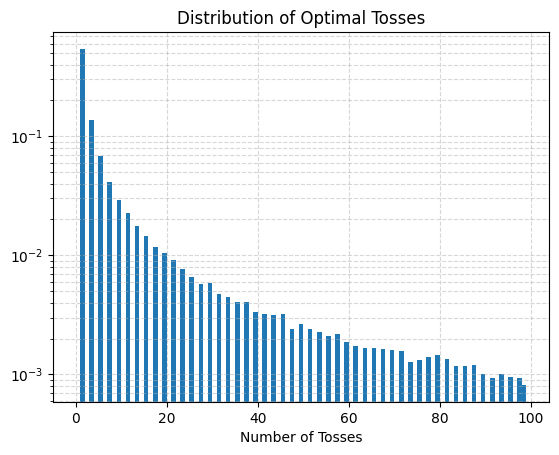

In [13]:
fig, ax = plt.subplots()
ax.hist(optimal_toss_counts, bins=range(0, 100, 1), density=True)
ax.set_title("Distribution of Optimal Tosses")
ax.set_xlabel("Number of Tosses")
ax.semilogy()
ax.grid(True, which="both", ls="--", alpha=0.5)
plt.show()